In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import seaborn as sns
import statsmodels.api as sm
#sns.set()

In [2]:
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values
x = sm.add_constant(X)

##coefficients for the regression line are taken from the OLS summary table
coef_x1 = 6.779e-05 
coef_const = 3.7490
yhat = x * coef_x1 + coef_const

In [6]:
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # output: [[6.30165767]]

[[6.30165767]]


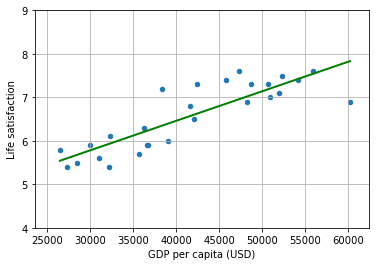

In [5]:
# Visualize the data

lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.plot(X, yhat, lw=2, c='green', label='regression line')
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [3]:
result = sm.OLS(y, x).fit()

In [4]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     66.66
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.62e-08
Time:                        08:52:28   Log-Likelihood:                -13.051
No. Observations:                  27   AIC:                             30.10
Df Residuals:                      25   BIC:                             32.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7490      0.354     10.593      0.000       3.020       4.478
x1          6.779e-05    8.3e-06      8.165      0.000    5.07e-05    8.49e-05
==============================================================================
Omnibus:                        0.438   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.059
Skew:                           0.111   Prob(JB):                        0.971
Kurtosis:                       3.049   Cond. No.                     1.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""